In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [3]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [4]:
data.index = pd.to_datetime(data.index)

In [9]:
data.head()
# has a lot of NAs

,FedFunds,Unemployment,HousingStarts,Inflation
1947-01-01,NaN,NaN,NaN,21.48
1947-02-01,NaN,NaN,NaN,21.62
1947-03-01,NaN,NaN,NaN,22.00
1947-04-01,NaN,NaN,NaN,22.00
1947-05-01,NaN,NaN,NaN,21.95


In [11]:
data = data.dropna()

In [12]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [16]:
split_1 = int(len(data)*0.6)
split_2 = int(len(data)*0.9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [17]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [18]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out) 
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [19]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [20]:
import matplotlib.pyplot as plt

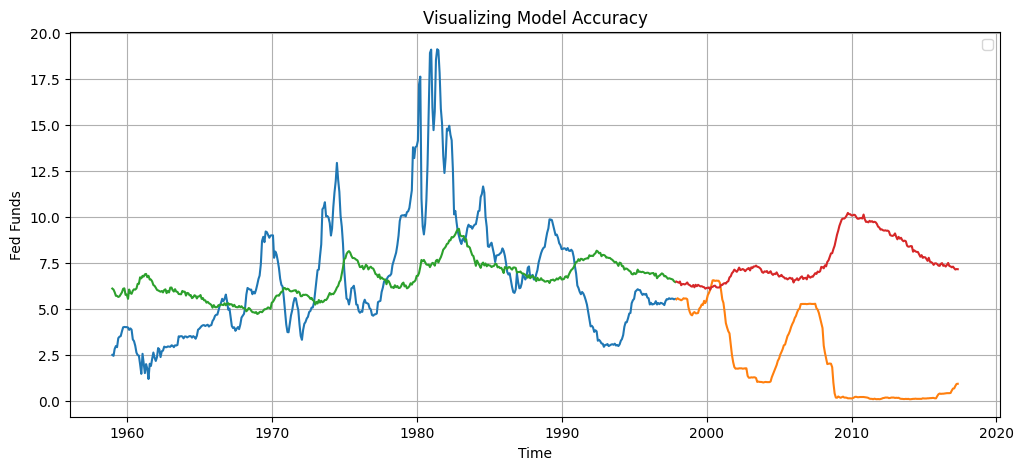

In [40]:
plt.figure(figsize = (12,5))

# In Sample Actual Fed Funds
plt.plot(y_in)

# Out of Sample Fed Funds
plt.plot(y_out)

# Model
plt.plot(model1.predict(X_in))

# Out of sample predictions
plt.plot(model1.predict(X_out))

# the in data was predictable (even though very minimally) but the out of sample data wasnt (due to changes in 
# Fed regimes etc.)

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
in_mse_1 = mean_squared_error(model1.predict(X_in),y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out),y_out)

In [43]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566852


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
degrees = 2

In [50]:
poly = PolynomialFeatures(degree = degrees)
# you can either use directory (dir) or PolynomialFeatures? for more info
X_in_poly = poly.fit_transform(X_in)
X_out_poly = poly.fit_transform(X_out)

In [49]:
dir(poly)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_combinations',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_max_degree',
 '_min_degree',
 '_more_tags',
 '_n_out_full',
 '_num_combinations',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'degree',
 'feature_names_in_',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_metadata_routing',
 'get_params'

In [64]:
max_degrees = 4

Degree 0


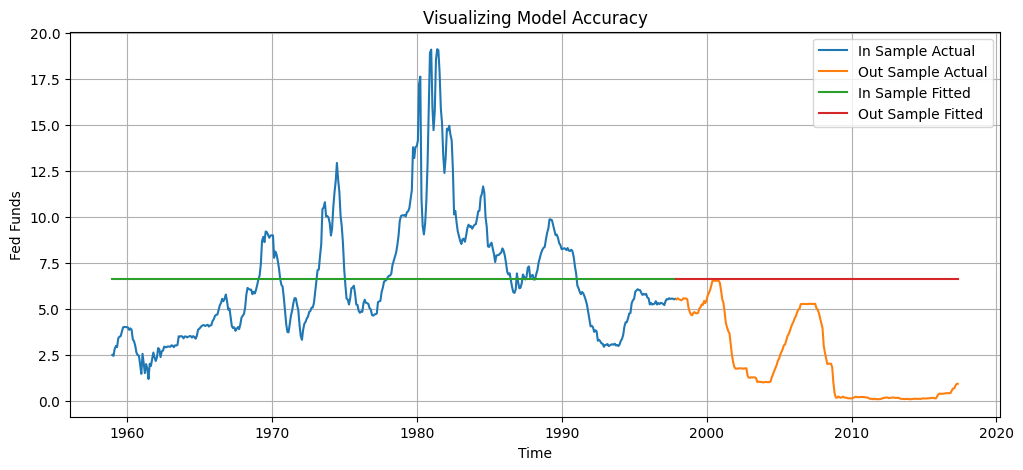

Insample MSE :  11.0394186098336
Outsample MSE :  24.614868056284035
Degree 1


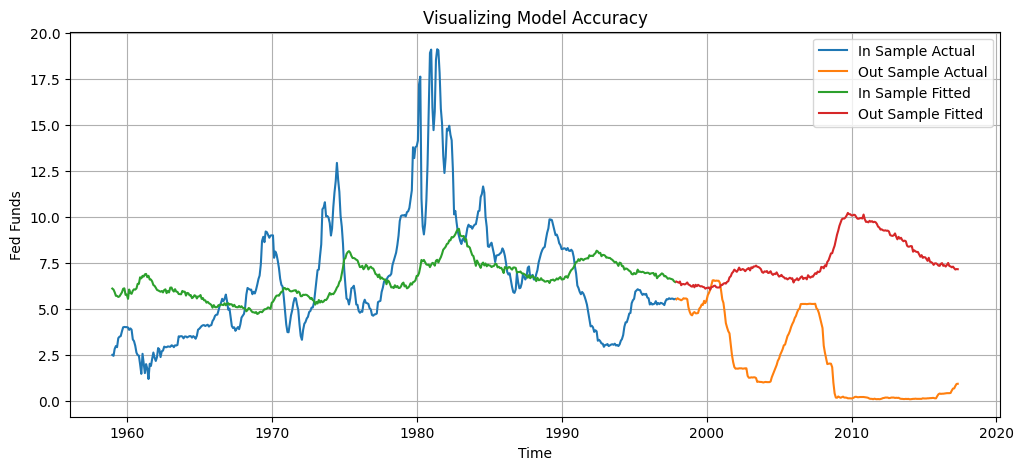

Insample MSE :  10.071422013168643
Outsample MSE :  40.360827835666946
Degree 2


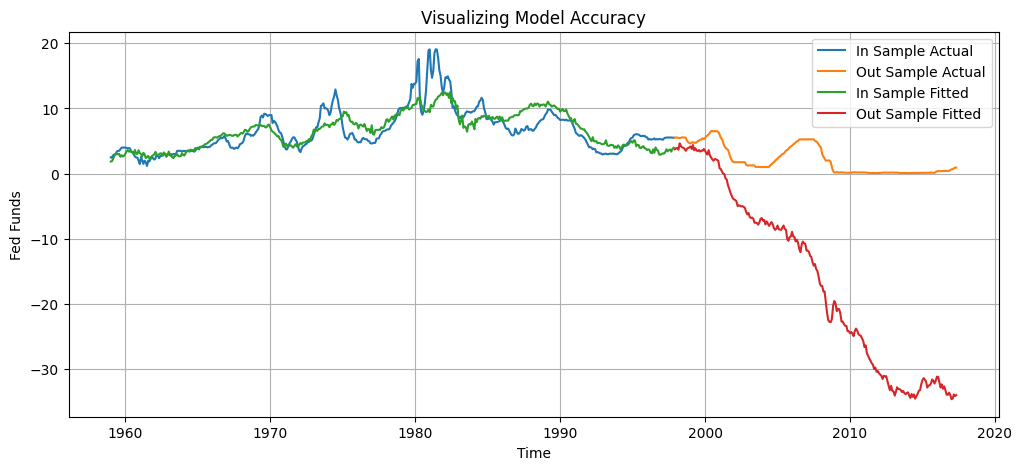

Insample MSE :  3.863477139276067
Outsample MSE :  481.44650990363215
Degree 3


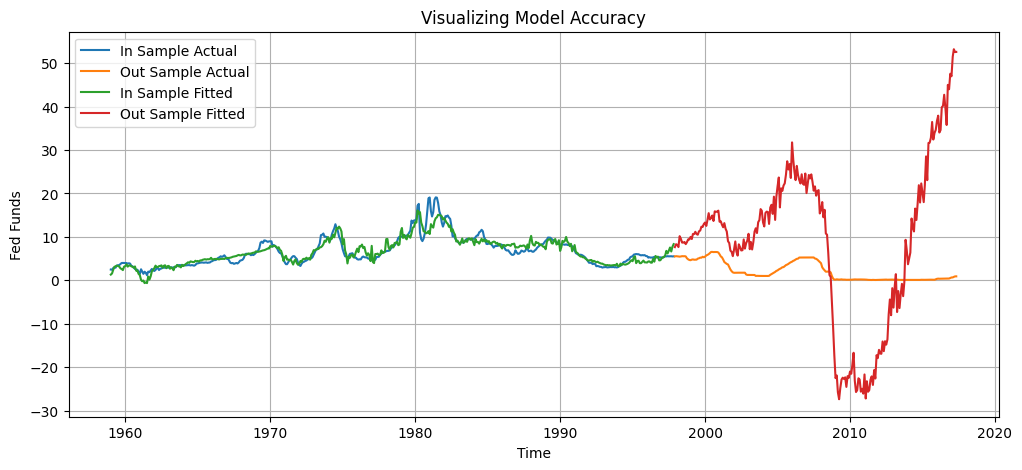

Insample MSE :  1.8723636271946136
Outsample MSE :  371.76618900618945
Degree 4


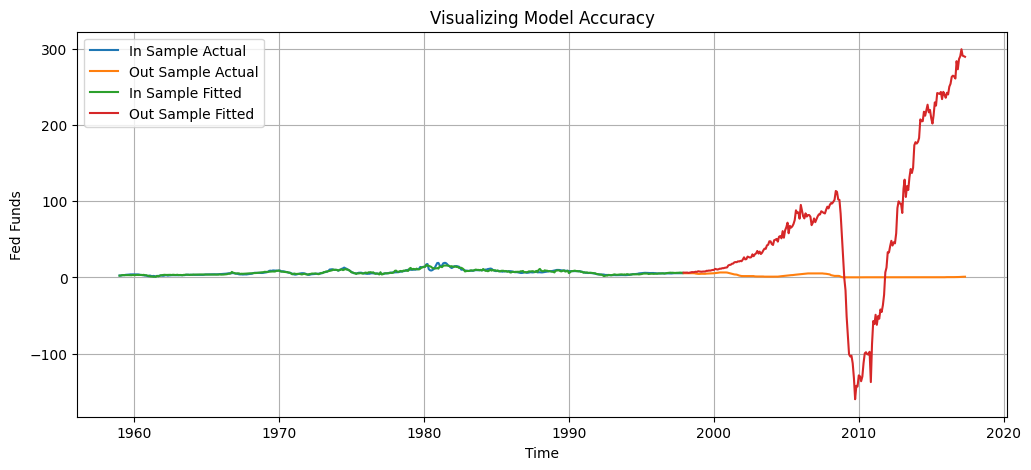

Insample MSE :  1.3284889129000697
Outsample MSE :  14273.3035053658


In [67]:
for degrees in range(1 + max_degrees):
    print("Degree", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)
    model = sm.OLS(y_in, X_in_poly).fit()
    pred_in = model.predict(X_in_poly)
    pred_in = pd.DataFrame(pred_in, index = y_in.index)
    pred_out = model.predict(X_out_poly)
    pred_out = pd.DataFrame(pred_out, index = y_out.index)
    
    plt.figure(figsize = (12,5))
    # In Sample Actual Fed Funds
    plt.plot(y_in, label ="In Sample Actual")
    # Out of Sample Fed Funds
    plt.plot(y_out, label ="Out Sample Actual")
    # Model
    plt.plot(pred_in, label ="In Sample Fitted")
    # Out of sample predictions
    plt.plot(pred_out, label ="Out Sample Fitted")
    # the in data was predictable (even though very minimally) but the out of sample data wasnt (due to changes in Fed regimes etc.)
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend()
    plt.grid()
    plt.show()
    
       
    in_mse_1 = mean_squared_error(model.predict(X_in_poly),y_in)
    out_mse_1 = mean_squared_error(model.predict(X_out_poly),y_out)
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

# 7.) State your observations :

- The increasing trend in the Outsample MSE suggests that higher-degree polynomials may be overfitting the data. Overfitting occurs when a model fits the training data too closely, capturing noise and making it less generalizable to new data (outsample).
- The results indicate that a quadratic (degree 2) or cubic (degree 3) polynomial might strike a good balance between capturing the underlying patterns and avoiding overfitting.
- A linear model (degree 1) might be underfitting, as it has relatively high Insample and Outsample MSE compared to higher-degree polynomials.
- The sharp increase in Outsample MSE for the fourth degree suggests that it is likely overfitting the data.